# Notebook 1 — Análisis Exploratorio de Datos (EDA)

Este cuaderno está generado a partir del archivo principal y está organizado en tres celdas: Imports, Carga de Datos y Funciones de Utilidad.

## Celda de Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingRegressor

## Celda de Carga de Datos (Ajusta rutas)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Ajusta esta ruta a tu entorno local (ej. 'data/cleaned_modified.csv')
DATA_PATH = r"""/content/drive/MyDrive/Colab Notebooks/SEXTO TRIMESTRE/cleaned_modified.csv"""  # <-- AJUSTAR

# Alternativas de ruta:
# DATA_PATH = "data/cleaned_modified.csv"
# DATA_PATH = "../data/cleaned_modified.csv"

df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head()

(8750, 18)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,dayofweek,is_weekend,day
0,339.0,10,-3.5,24,1.2,1996,-21.2,0.65,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,0,1
1,360.0,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,0,1
2,449.0,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,0,1
3,451.0,13,2.4,25,1.6,2000,-15.6,1.16,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,0,1
4,447.0,14,3.0,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,0,1


## Celda de Funciones de Utilidad

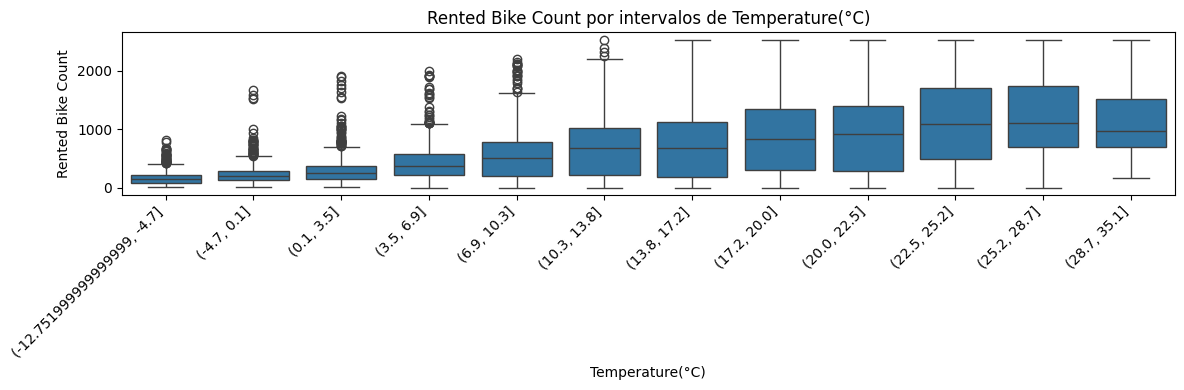

/tmp/ipython-input-749993066.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bin = tmp.groupby("bin")[target].mean()


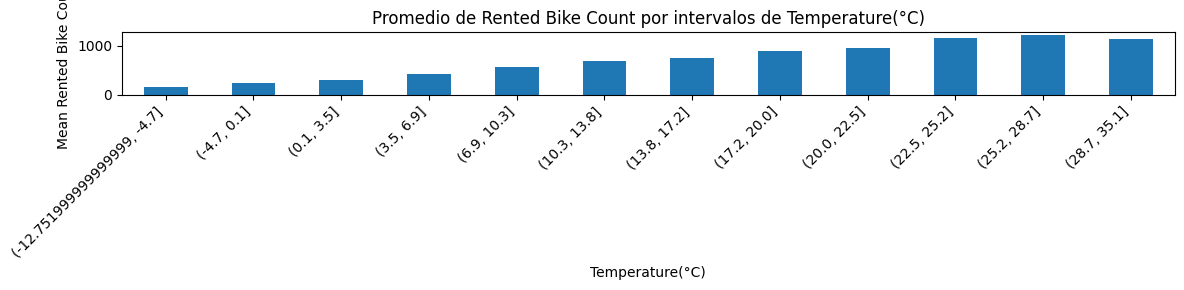

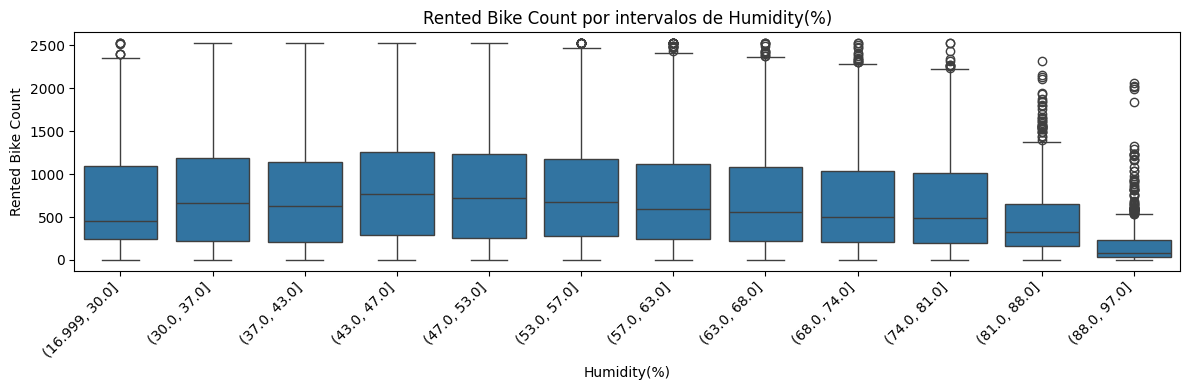

/tmp/ipython-input-749993066.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bin = tmp.groupby("bin")[target].mean()


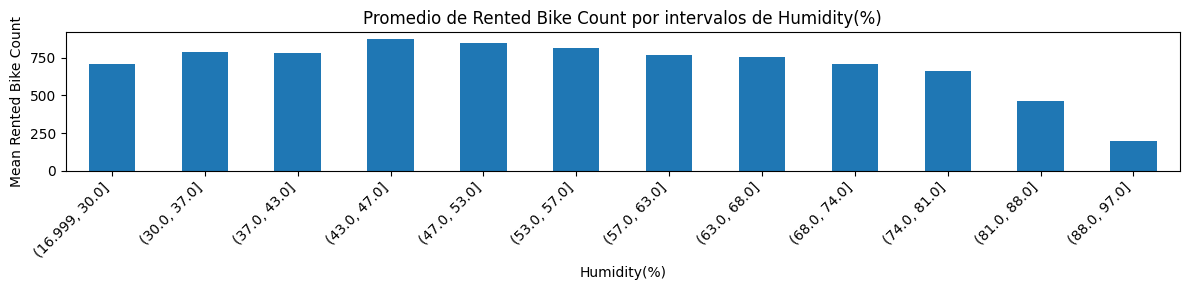

🔹 Correlaciones con Rented Bike Count:


,Rented Bike Count
Rented Bike Count,1.000000
Temperature(°C),0.544105
Hour,0.412190
Dew point temperature(°C),0.382594
Solar Radiation (MJ/m2),0.265219
year,0.216581
Visibility (10m),0.200594
month,0.137200
Wind speed (m/s),0.122285
day,0.021760


,Rented Bike Count
Rented Bike Count,1.000000
Temperature(°C),0.544105
Hour,0.412190
Dew point temperature(°C),0.382594
Solar Radiation (MJ/m2),0.265219
year,0.216581
Visibility (10m),0.200594
month,0.137200
Wind speed (m/s),0.122285
day,0.021760



🔎 Top 10 outliers por |z-score| de Rented Bike Count:


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,dayofweek,is_weekend,day
4663,2526.53,17,25.6,57,0.0,0.0,Summer,No Holiday,Yes,2018,6,2,0,13
6968,2526.53,18,25.3,56,0.0,0.0,Autumn,No Holiday,Yes,2018,9,0,0,17
7808,2526.53,18,17.3,43,0.0,0.0,Autumn,No Holiday,Yes,2018,10,0,0,22
5336,2526.53,18,28.4,75,0.0,0.0,Summer,No Holiday,Yes,2018,7,2,0,11
6728,2526.53,18,24.4,34,0.0,0.0,Autumn,No Holiday,Yes,2018,9,4,0,7
4112,2526.53,18,21.6,48,0.0,0.0,Spring,No Holiday,Yes,2018,5,0,0,21
3968,2526.53,18,27.5,47,0.0,0.0,Spring,No Holiday,Yes,2018,5,1,0,15
6680,2526.53,18,27.0,45,0.0,0.0,Autumn,No Holiday,Yes,2018,9,2,0,5
5384,2526.53,18,30.8,60,0.0,0.0,Summer,No Holiday,Yes,2018,7,4,0,13
5360,2526.53,18,27.5,77,0.0,0.0,Summer,No Holiday,Yes,2018,7,3,0,12


In [8]:
# =========================
# Utilidades EDA sin modelo
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def guess_target(df, candidates=None):
    """Intenta adivinar la columna objetivo en el dataset."""
    if candidates is None:
        candidates = [
            "Rented Bike Count", "Rented Bike", "Bike Count",
            "count", "y", "target", "rentals"
        ]
    for c in candidates:
        if c in df.columns:
            return c
    return None

def boxplot_by_bins(df_in, feature, target=None, bins=10, label=None):
    """
    Si existe target: boxplot del target por bins del feature.
    Si no hay target: muestra boxplot simple del feature y un histograma.
    """
    if feature not in df_in.columns:
        print(f"[info] '{feature}' no está en columnas.")
        return

    tmp = df_in[[feature]].copy()
    if target is not None and target in df_in.columns:
        tmp[target] = df_in[target]

    # Crear bins por cuantiles (maneja duplicados), si falla usar bins iguales
    try:
        tmp["bin"] = pd.qcut(tmp[feature], q=bins, duplicates="drop")
    except ValueError:
        tmp["bin"] = pd.cut(tmp[feature], bins=min(bins, 5))

    if target is not None and target in tmp.columns:
        # Boxplot del target por bins del feature
        plt.figure(figsize=(12, 4))
        sns.boxplot(data=tmp, x="bin", y=target)
        plt.xticks(rotation=45, ha="right")
        plt.title(f"{target} por intervalos de {label or feature}")
        plt.xlabel(label or feature)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

        # Promedio del target por bin (barras)
        mean_bin = tmp.groupby("bin")[target].mean()
        plt.figure(figsize=(12, 3))
        mean_bin.plot(kind="bar")
        plt.xticks(rotation=45, ha="right")
        plt.title(f"Promedio de {target} por intervalos de {label or feature}")
        plt.xlabel(label or feature); plt.ylabel(f"Mean {target}")
        plt.tight_layout(); plt.show()
    else:
        # No hay target: boxplot e hist del feature
        plt.figure(figsize=(12, 4))
        sns.boxplot(x=tmp[feature])
        plt.title(f"Distribución de {label or feature} (boxplot)")
        plt.tight_layout(); plt.show()

        plt.figure(figsize=(12, 4))
        tmp[feature].hist(bins=30)
        plt.title(f"Distribución de {label or feature} (histograma)")
        plt.xlabel(label or feature); plt.ylabel("Frecuencia")
        plt.tight_layout(); plt.show()

# =========================
# Ejecutar ejemplos de boxplot
# =========================
TARGET = guess_target(df)  # intenta detectar "Rented Bike Count", etc.

# Ajusta las columnas según existan en tu dataset:
boxplot_by_bins(df, "Temperature(°C)", target=TARGET, bins=12, label="Temperature(°C)")
boxplot_by_bins(df, "Humidity(%)",     target=TARGET, bins=12, label="Humidity(%)")

# =========================
# Correlaciones numéricas
#   - si hay TARGET, correlación contra TARGET
#   - si no, top correlaciones globales
# =========================
num_cols = df.select_dtypes(include=[np.number])
if not num_cols.empty:
    if TARGET is not None and TARGET in num_cols.columns:
        corr_t = num_cols.corr()[TARGET].sort_values(ascending=False)
        print(f"🔹 Correlaciones con {TARGET}:")
        display(corr_t.head(15))
        display(corr_t.tail(15))
    else:
        corr_mat = num_cols.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_mat, cmap="viridis")
        plt.title("Matriz de correlación (numéricas)")
        plt.tight_layout(); plt.show()

# =========================
# Top outliers para inspección (opcional, sin modelo)
#   - Si hay TARGET: muestra las observaciones con mayor |z-score| del TARGET
#   - Si no hay TARGET: salta esta parte
# =========================
if TARGET is not None and TARGET in df.columns and df[TARGET].std() > 0:
    z = (df[TARGET] - df[TARGET].mean()) / df[TARGET].std()
    topk = 10
    print(f"\n🔎 Top {topk} outliers por |z-score| de {TARGET}:")
    cols_show = [c for c in [
        TARGET, "Date", "Hour", "Temperature(°C)", "Humidity(%)",
        "Rainfall(mm)", "Snowfall (cm)", "Seasons", "Holiday", "Functioning Day",
        "year", "month", "dayofweek", "is_weekend", "day"
    ] if c in df.columns]
    top_df = df.loc[np.argsort(-np.abs(z))[:topk], cols_show]
    display(top_df)
else:
    print("ℹ️ Sin columna objetivo detectada o desviación estándar nula: se omite el ranking de outliers.")
